In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')
from sklearn.cluster import KMeans

## EDA

In [2]:
df=pd.read_csv("Customer Segmentation & Clustering Data.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

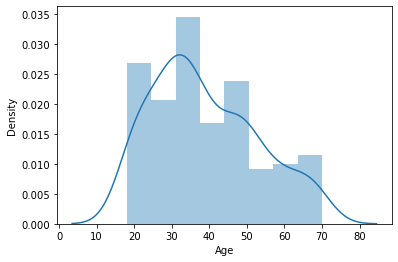

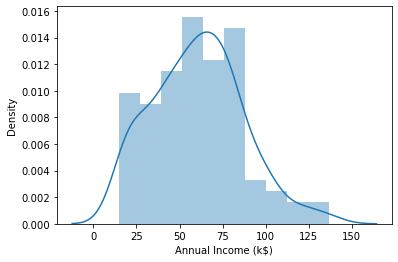

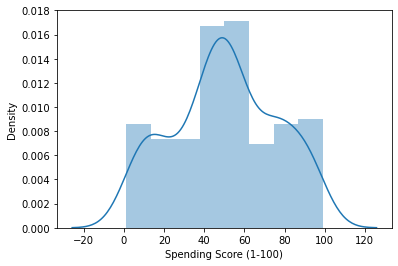

In [7]:
# Histogram Plotting
for i in columns:
    plt.figure()
    sns.distplot(df[i])

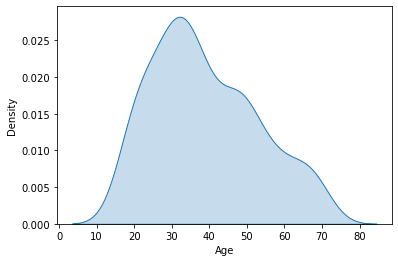

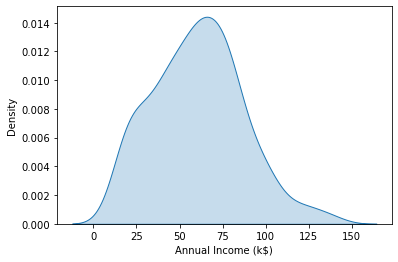

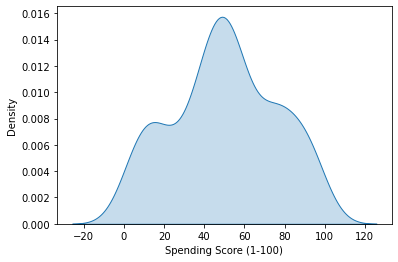

In [8]:
# KDE Plotting
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True)

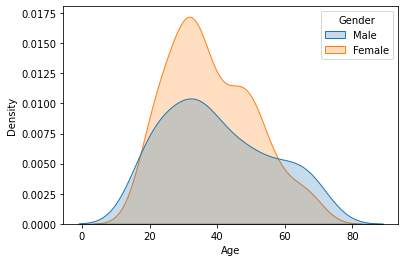

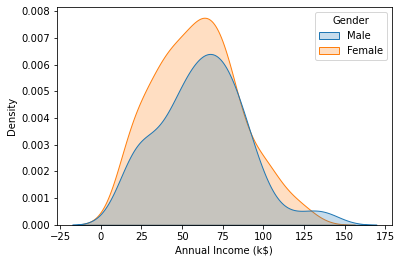

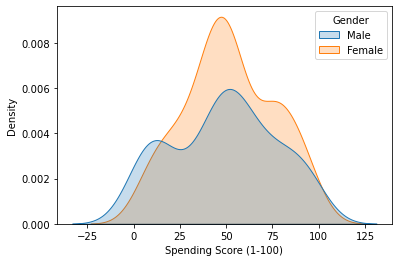

In [9]:
# KDE Plotting w.r.t Gender
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True, hue=df["Gender"])

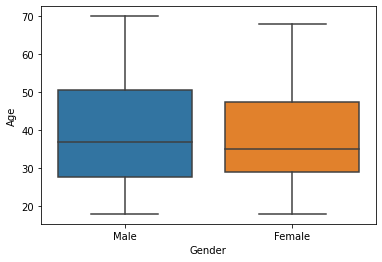

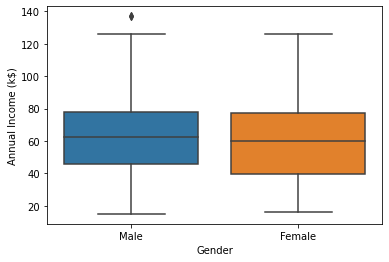

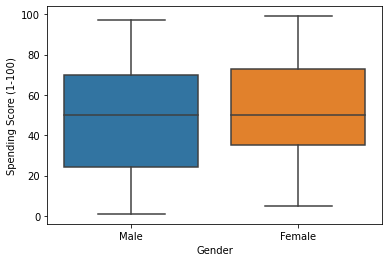

In [10]:
# Box Plotting
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x= "Gender", y= df[i])

### Bivariate Analysis

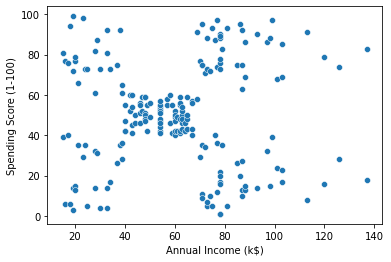

In [11]:
# Scatter Ploting between AI and SS
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)");

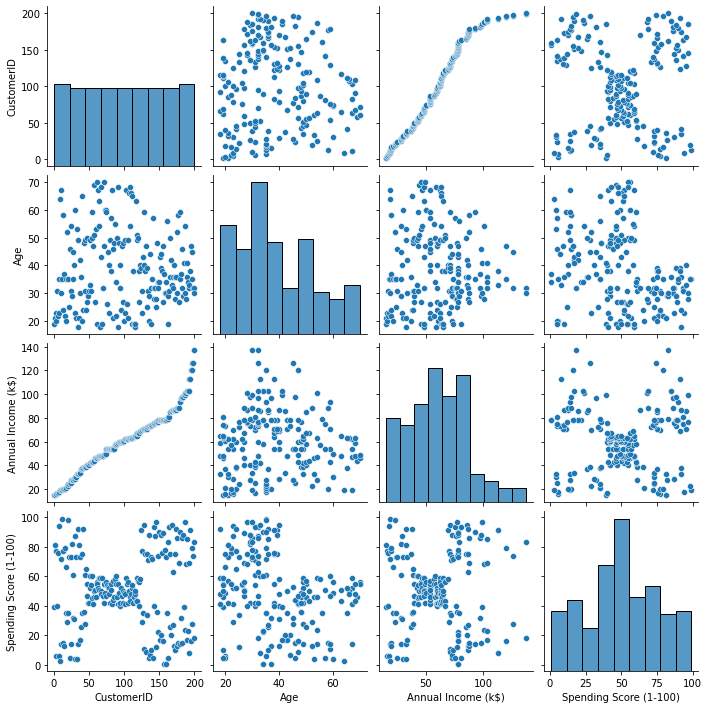

In [12]:
# Pair Plotting of Complete Dataframe
sns.pairplot(df);

In [13]:
# Removing unnecessary columns from the data
df_mod=df.drop("CustomerID", axis=1)
df_mod.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


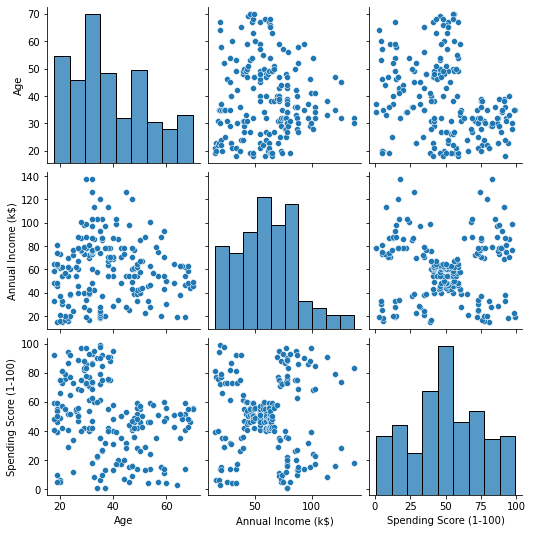

In [14]:
sns.pairplot(df_mod);

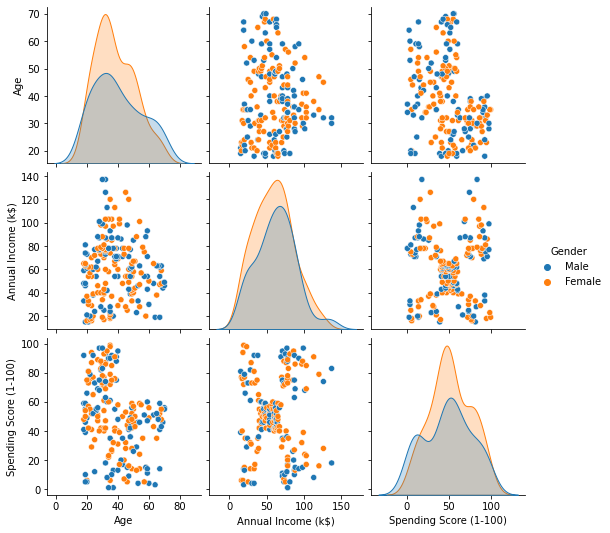

In [15]:
sns.pairplot(df_mod, hue="Gender");

In [16]:
df_mod.groupby(["Gender"])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [17]:
df_mod.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


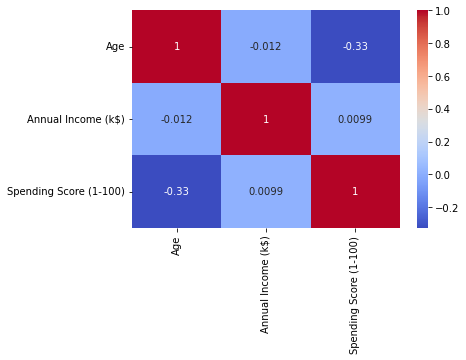

In [18]:
sns.heatmap(df_mod.corr(), annot=True, cmap="coolwarm");

## KMeans Clustering - Univariate, Bivariate, Multivariate

### Univariate Clustering

In [19]:
clustering1 = KMeans() #Initiating of ML algorithm

In [25]:
clustering1.fit(df_mod[["Annual Income (k$)"]]) #fitting of data in the model

KMeans()

In [26]:
clustering1.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0,
       0, 0])

In [27]:
df_mod["Income Cluster"]= clustering1.labels_

In [28]:
df_mod.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,3
3,Female,23,16,77,3
4,Female,31,17,40,3


In [36]:
df_mod['Income Cluster'].value_counts()

2    42
4    36
3    32
7    28
1    26
6    16
5    14
0     6
Name: Income Cluster, dtype: int64

In [38]:
# Finding the ideal number of clusters for our data in this model

clustering1.inertia_

2822.4996947496943

In [76]:
inertia_score = []

In [77]:
for i in range (1,11):
    clustering_check = KMeans(n_clusters=i)
    clustering_check.fit(df_mod[["Annual Income (k$)"]])
    inertia_score.append(clustering_check.inertia_)
    

In [78]:
print(inertia_score)

[137277.28000000003, 48660.88888888889, 23517.330930930926, 13278.112713472487, 8481.496190476191, 5050.904761904763, 3931.988095238096, 2822.4996947496943, 2168.4787157287155, 1758.812049062049]


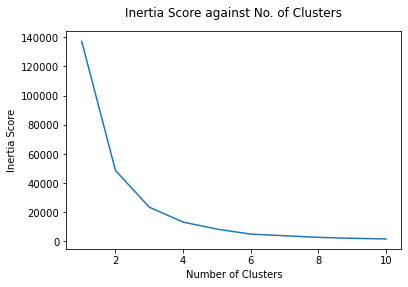

In [79]:
plt.plot(range(1,11), inertia_score)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Score against No. of Clusters", y=1.04);

#### As per graph data, the Ideal number of Clusters will be 3 in this model

In [80]:
# Starting the Model Again

clustering1 = KMeans (n_clusters=3)
clustering1.fit(df_mod[["Annual Income (k$)"]])
df_mod["Income Cluster"] = clustering1.labels_
df_mod["Income Cluster"].value_counts()

0    92
1    72
2    36
Name: Income Cluster, dtype: int64

In [81]:
df_mod.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [82]:
df_mod.groupby("Income Cluster").mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.184783,66.717391,50.054348
1,38.930556,33.027778,50.166667
2,37.833333,99.888889,50.638889


### Bivariate Clustering

In [88]:
clustering2 = KMeans()
clustering2.fit(df_mod[["Annual Income (k$)","Spending Score (1-100)"]])
df_mod["Spending and Income Cluster"]=clustering2.labels_
df_mod["Spending and Income Cluster"].value_counts()

0    44
5    43
2    29
6    22
3    21
4    21
1    10
7    10
Name: Spending and Income Cluster, dtype: int64

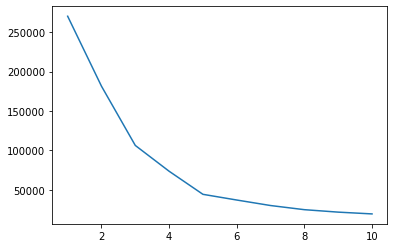

In [92]:
inertia_score2=[]
for i in range (1,11):
    clustering_check2=KMeans(n_clusters=i)
    clustering_check2.fit(df_mod[["Annual Income (k$)","Spending Score (1-100)"]])
    inertia_score2.append(clustering_check2.inertia_)
    
plt.plot(range(1,11),inertia_score2);

In [94]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df_mod[["Annual Income (k$)","Spending Score (1-100)"]])
df_mod["Spending and Income Cluster"]=clustering2.labels_
df_mod["Spending and Income Cluster"].value_counts()

2    81
3    39
0    35
4    23
1    22
Name: Spending and Income Cluster, dtype: int64

In [95]:
df_mod.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,1
2,Female,20,16,6,1,4
3,Female,23,16,77,1,1
4,Female,31,17,40,1,4


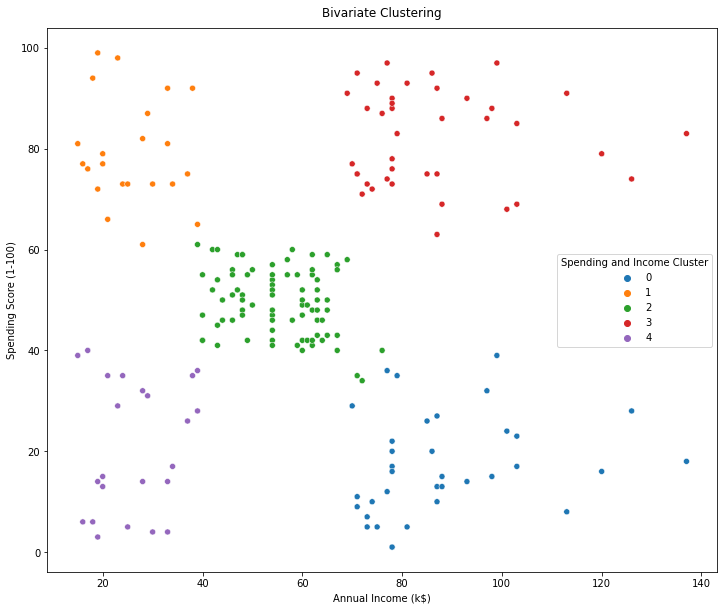

In [118]:
# Visualization of Bivariate Clustering
plt.figure(figsize=(12,10))
plt.title ("Bivariate Clustering", y=1.01)
sns.scatterplot(data=df_mod, x="Annual Income (k$)", y="Spending Score (1-100)", hue ="Spending and Income Cluster", palette="tab10" );

In [119]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers

,0,1
0,88.200000,17.114286
1,25.727273,79.363636
2,55.296296,49.518519
3,86.538462,82.128205
4,26.304348,20.913043


In [120]:
centers.columns=("x","y")
centers

,x,y
0,88.200000,17.114286
1,25.727273,79.363636
2,55.296296,49.518519
3,86.538462,82.128205
4,26.304348,20.913043


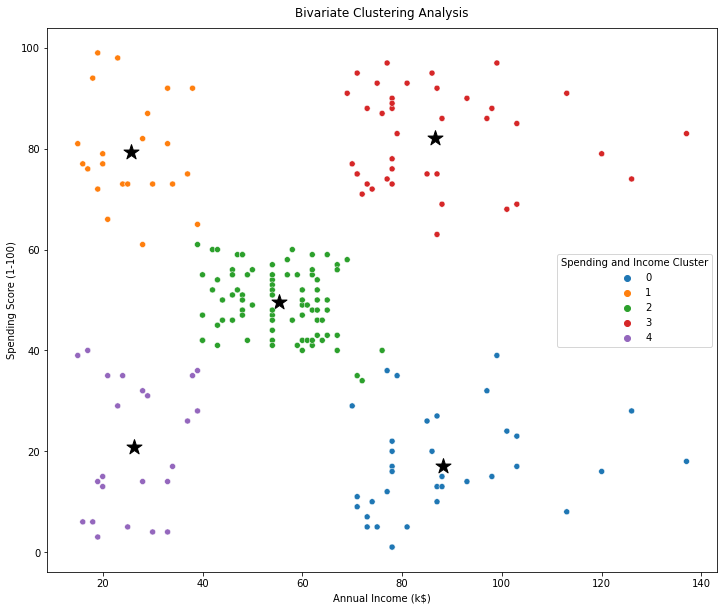

In [173]:
plt.figure(figsize=(12,10))
plt.title("Bivariate Clustering Analysis", y=1.01 )
plt.scatter(x=centers["x"], y=centers["y"], s=250, c="black", marker = "*")
sns.scatterplot(data=df_mod, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Spending and Income Cluster", palette ="tab10");
plt.savefig("Bivariate Clustering.png")

In [139]:
df_mod.groupby("Spending and Income Cluster")["Age","Annual Income (k$)","Spending Score (1-100)"].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,25.272727,25.727273,79.363636
2,42.716049,55.296296,49.518519
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


In [149]:
pd.crosstab(df_mod['Spending and Income Cluster'],df_mod['Gender'], normalize="index")

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.590909,0.409091
2,0.592593,0.407407
3,0.538462,0.461538
4,0.608696,0.391304


### Multivariate Clustering

In [150]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [157]:
df_mod_final=pd.get_dummies(df_mod, drop_first=True)
df_mod_final.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,1,4,1
1,21,15,81,1,1,1
2,20,16,6,1,4,0
3,23,16,77,1,1,0
4,31,17,40,1,4,0


In [158]:
df_mod_final=df_mod_final[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
df_mod_final.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [161]:
df_mod_final=pd.DataFrame(scaler.fit_transform(df_mod_final))
df_mod_final.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


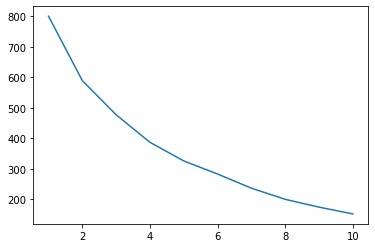

In [163]:
inertia_score3=[]

for i in range(1,11):
    clustering_check3=KMeans(n_clusters=i)
    clustering_check3.fit(df_mod_final)
    inertia_score3.append(clustering_check3.inertia_)
plt.plot(range(1,11),inertia_score3)

In [168]:
clustering3=KMeans(n_clusters=4)
clustering3.fit(df_mod_final)
df_mod["Multivariate Cluster"]=clustering3.labels_
df_mod["Multivariate Cluster"].value_counts()

0    57
1    55
2    45
3    43
Name: Multivariate Cluster, dtype: int64

In [169]:
df_mod.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Multivariate Cluster
0,Male,19,15,39,1,4,3
1,Male,21,15,81,1,1,3
2,Female,20,16,6,1,4,1
3,Female,23,16,77,1,1,0
4,Female,31,17,40,1,4,0


In [170]:
df_mod

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Multivariate Cluster
0,Male,19,15,39,1,4,3
1,Male,21,15,81,1,1,3
2,Female,20,16,6,1,4,1
3,Female,23,16,77,1,1,0
4,Female,31,17,40,1,4,0
...,...,...,...,...,...,...,...
195,Female,35,120,79,2,3,0
196,Female,45,126,28,2,0,1
197,Male,32,126,74,2,3,3
198,Male,32,137,18,2,0,2


In [172]:
df_mod.to_csv("Customer Segmentation & Clustering Output.csv")